# Google Merchandise Store - Exploratory Data Analysis with Python and SQL

# Step 1: Extract Data

The sample dataset contains Google Analytics 360 data (01/08/2016 - 01/08/2017) from the Google Merchandise Store, a real ecommerce store. The goal of this analysis is to address some key questions in marketing/web analytics from different angles such as channel performance in terms of traffic and revenue, individual page performance, and checkout process performance. I mainly used Python Client for BigQuery library along with pandas and matplotlib libraries to extract, query, and visualize data.

Data from: https://bigquery.cloud.google.com/table/bigquery-public-data:google_analytics_sample.ga_sessions_20170731

In [1]:
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

#Maths and Vectors
import pandas as pd
import numpy as np

#Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from google.cloud import bigquery

In [2]:
# Create a client object
client = bigquery.Client()

# Create a dataset reference
dataset_ref = client.dataset("google_analytics_sample", project = "bigquery-public-data")

# Retrieve a dataset from reference
dataset = client.get_dataset(dataset_ref)

# Check available tables in the dataset
for x in client.list_tables(dataset):
    print(x.table_id)

Using Kaggle's public dataset BigQuery integration.
ga_sessions_20160801
ga_sessions_20160802
ga_sessions_20160803
ga_sessions_20160804
ga_sessions_20160805
ga_sessions_20160806
ga_sessions_20160807
ga_sessions_20160808
ga_sessions_20160809
ga_sessions_20160810
ga_sessions_20160811
ga_sessions_20160812
ga_sessions_20160813
ga_sessions_20160814
ga_sessions_20160815
ga_sessions_20160816
ga_sessions_20160817
ga_sessions_20160818
ga_sessions_20160819
ga_sessions_20160820
ga_sessions_20160821
ga_sessions_20160822
ga_sessions_20160823
ga_sessions_20160824
ga_sessions_20160825
ga_sessions_20160826
ga_sessions_20160827
ga_sessions_20160828
ga_sessions_20160829
ga_sessions_20160830
ga_sessions_20160831
ga_sessions_20160901
ga_sessions_20160902
ga_sessions_20160903
ga_sessions_20160904
ga_sessions_20160905
ga_sessions_20160906
ga_sessions_20160907
ga_sessions_20160908
ga_sessions_20160909
ga_sessions_20160910
ga_sessions_20160911
ga_sessions_20160912
ga_sessions_20160913
ga_sessions_20160914
ga_

In [3]:
# Create a table reference
table_ref_20170731 = dataset_ref.table("ga_sessions_20170731")

# Retrieve table from reference
table_20170731 = client.get_table(table_ref_20170731)

# View columns
client.list_rows(table_20170731, max_results = 5).to_dataframe()

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,clientId,channelGrouping,socialEngagementType
0,NaN,1,1501520683,1501520683,20170731,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Firefox', 'browserVersion': 'not ...","{'continent': 'Europe', 'subContinent': 'Easte...",[],"[{'hitNumber': 1, 'time': 0, 'hour': 10, 'minu...",2219384770970157334,None,None,Organic Search,Not Socially Engaged
1,NaN,1,1501512773,1501512773,20170731,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Internet Explorer', 'browserVersi...","{'continent': 'Europe', 'subContinent': 'North...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 7, 'minut...",3257231109110009503,None,None,Organic Search,Not Socially Engaged
2,NaN,1,1501559508,1501559508,20170731,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Southea...",[],"[{'hitNumber': 1, 'time': 0, 'hour': 20, 'minu...",1481009813315636845,None,None,Organic Search,Not Socially Engaged
3,NaN,1,1501520907,1501520907,20170731,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'South...",[],"[{'hitNumber': 1, 'time': 0, 'hour': 10, 'minu...",4042576478930992747,None,None,Organic Search,Not Socially Engaged
4,NaN,1,1501486642,1501486642,20170731,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Southea...","[{'index': 4, 'value': 'APAC'}]","[{'hitNumber': 1, 'time': 0, 'hour': 0, 'minut...",1478324366289834997,None,None,Organic Search,Not Socially Engaged


**Some columns such as totals, trafficSource, device, geoNetwork, customDimensions, and hits contain nested data, hence, we would want to check the data schema of them.**

In [4]:
print("Schema Field of totals column \n")
print(table_20170731.schema[5].to_standard_sql(), end = "\n")

print("Schema Field of trafficSource column \n")
print(table_20170731.schema[6].to_standard_sql(), end = "\n")

print("Schema Field of device column \n")
print(table_20170731.schema[7].to_standard_sql(), end = "\n")

print("Schema Field of geoNetwork column \n")
print(table_20170731.schema[8].to_standard_sql(), end = "\n")

print("Schema Field of customDimensions column \n")
print(table_20170731.schema[9].to_standard_sql(), end = "\n")

print("Schema Field of hits column \n")
print(table_20170731.schema[10].to_standard_sql(), end = "\n")

Schema Field of totals column 

name: "totals"
type {
  type_kind: STRUCT
  struct_type {
    fields {
      name: "visits"
      type {
        type_kind: INT64
      }
    }
    fields {
      name: "hits"
      type {
        type_kind: INT64
      }
    }
    fields {
      name: "pageviews"
      type {
        type_kind: INT64
      }
    }
    fields {
      name: "timeOnSite"
      type {
        type_kind: INT64
      }
    }
    fields {
      name: "bounces"
      type {
        type_kind: INT64
      }
    }
    fields {
      name: "transactions"
      type {
        type_kind: INT64
      }
    }
    fields {
      name: "transactionRevenue"
      type {
        type_kind: INT64
      }
    }
    fields {
      name: "newVisits"
      type {
        type_kind: INT64
      }
    }
    fields {
      name: "screenviews"
      type {
        type_kind: INT64
      }
    }
    fields {
      name: "uniqueScreenviews"
      type {
        type_kind: INT64
      }
    }
    fie

# Step 2: Explore, Visualize and Interpret Results

In this analysis, I focused on addressing below questions:
* How much traffic did the website get over time?
* Which channel drove the most traffic to the website in 2017?
* Which channel generated the most transactions and revenue in 2017?
* What were the most popular pages in 2017?
* How did the checkout process of Apparel product category perform in 2017?

#### How much traffic did the website get over time?
#### Which channel drove the most traffic to the website in 2016?

<Axes: title={'center': 'Pageviews Breakdown By Channel - 2016'}, xlabel='channel'>

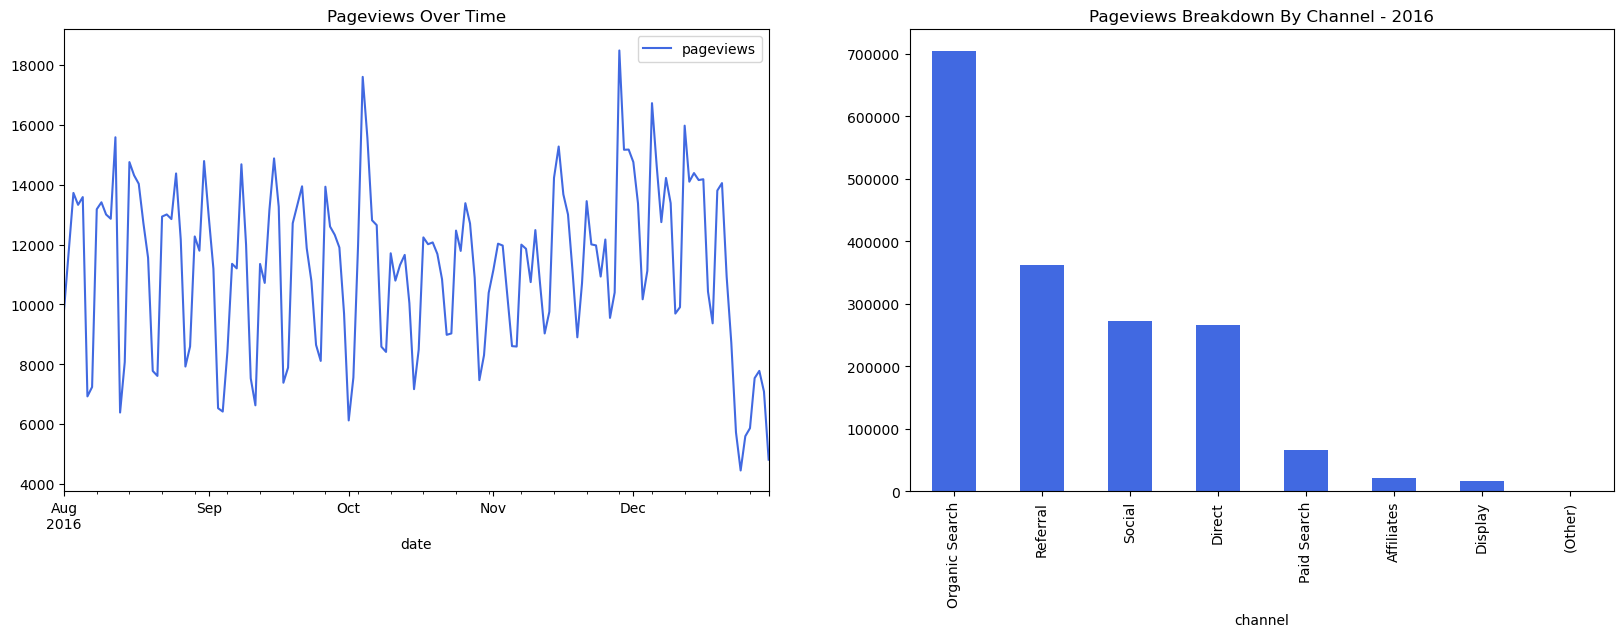

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# How much traffic did the website get over time?
query1 = """
        SELECT date
        , SUM(totals.pageviews) AS pageviews
        FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
        WHERE _TABLE_SUFFIX BETWEEN '20160801' AND '20161230'
        GROUP BY 1
        ORDER BY 1
        """

result1 = client.query(query1).result().to_dataframe()
result1['date'] = pd.to_datetime(result1['date'])
result1.plot(y='pageviews', x='date', kind='line', color='royalblue', title='Pageviews Over Time', ax=axes[0])

# Which channel drove the most traffic to the website?
query2 = """
        SELECT channelgrouping AS channel
        , SUM(totals.pageviews) AS pageviews
        FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
        WHERE _TABLE_SUFFIX BETWEEN '20160101' AND '20161230'
        GROUP BY 1
        ORDER BY 2 DESC
        """
result2 = client.query(query2).result().to_dataframe()
result2.plot(y='pageviews', x='channel', kind='bar', color='royalblue', legend=False, title='Pageviews Breakdown By Channel - 2016', ax=axes[1])

**From the line chart, we can see that the traffic decreased to the lowest percentage by the end of Aug 2016. The majority of traffic came from organic search, referral, and direct channels.**

#### Which channel generated the most transactions and revenue in 2016?

[Text(0, 0, 'Referral'),
 Text(1, 0, 'Organic Search'),
 Text(2, 0, 'Direct'),
 Text(3, 0, 'Paid Search'),
 Text(4, 0, 'Display'),
 Text(5, 0, 'Social'),
 Text(6, 0, 'Affiliates'),
 Text(7, 0, '(Other)')]

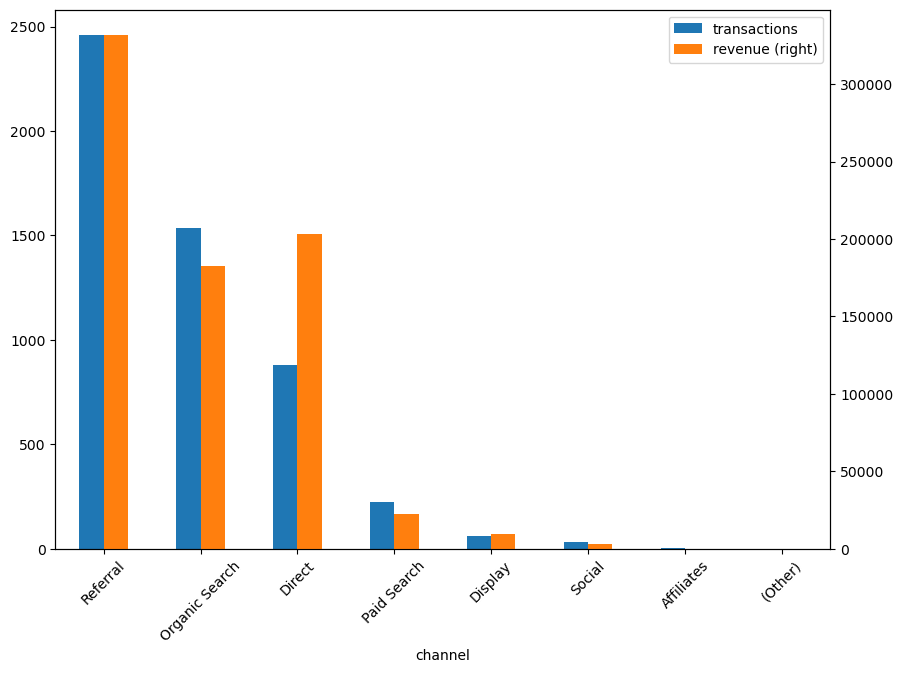

In [6]:
# Which channel generated the most transactions and revenue?
query = """
        SELECT channelgrouping AS channel
        , COUNT(DISTINCT hits.transaction.transactionid) AS transactions
        , SUM(hits.transaction.transactionrevenue)/1000000 AS revenue
        , COUNT(DISTINCT hits.transaction.transactionid)/SUM(totals.visits) AS conversion_rate
        FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
        , UNNEST(hits) AS hits
        WHERE _TABLE_SUFFIX BETWEEN '20160801' AND '20161230'
        GROUP BY 1
        ORDER BY 2 DESC
        """
result = client.query(query).result().to_dataframe()
fig, ax = plt.subplots(figsize=(10,7))
result.plot(y=['transactions', 'revenue'], x='channel', kind='bar', secondary_y='revenue', ax=ax)
ax.set_xticklabels(labels=result['channel'], rotation=45)

Referral channel generated the most transactions and revenue, although the amount of traffic driven by this channel was less than half of that driven by organic search channel. Direct channel came at third place in the number of transactions, after organic search channel, yet it generated more revenue. Similarly, display also appeared as a promising channel. 

Following this insight, we can: 
* Look further into the product category distribution of each channel to evaluate which channel would be more effective to promote which product category
* Increase budget for display channel

#### What were the most popular pages in 2016?

In [7]:
# What were the most popular pages, excluding pages in the checkout process?
query = """
        SELECT hits.page.pagepath AS page
        , SUM(totals.pageviews) AS pageviews
        , ROUND(AVG(totals.timeonsite), 1) AS avg_time_on_page
        , COUNT(DISTINCT fullvisitorid) AS users
        , ROUND(100*SUM(totals.bounces)/SUM(totals.visits),2) AS bounce_rate
        FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
        , UNNEST(hits) AS hits
        WHERE _TABLE_SUFFIX BETWEEN '20160101' AND '20171230'
        AND hits.page.pagepath NOT LIKE '%html'
        GROUP BY 1
        ORDER BY pageviews DESC
        """
result = client.query(query).result().to_dataframe()
result.head(20)

,page,pageviews,avg_time_on_page,users,bounce_rate
0,/home,6915538,342.0,544331,29.45
1,/google+redesign/apparel/men++s/men++s+t+shirts,1909502,686.5,44760,9.11
2,/google+redesign/office,1756629,871.2,31898,1.88
3,/google+redesign/bags,1648114,739.1,36450,4.74
4,/google+redesign/electronics,1640051,739.7,40526,3.42
5,/google+redesign/drinkware,1556022,783.1,35832,6.33
6,/google+redesign/shop+by+brand/youtube,1453032,378.2,104525,25.35
7,/google+redesign/apparel,1241606,683.0,36677,4.21
8,/google+redesign/apparel/men++s/men++s+outerwear,1119797,642.6,25872,4.72
9,/google+redesign/accessories/fun,1113178,827.4,24763,0.91


**From the individual page performance table, we can idenfity pages with good user engagement (high time on page and low bounce rate) but low traffic. With this information, we can implement appropriate SEO strategies to further enhance their performance.**

#### How did the checkout process of Apparel product category perform?

In [8]:
# How did the checkout process of Apparel product category perform?
query = """
        WITH checkout_process AS (
        SELECT CASE WHEN hits.page.pagepath = '/yourinfo.html' THEN '1. Add billing and shipping information'
                    WHEN hits.page.pagepath = '/payment.html' THEN '2. Add payment method'
                    WHEN hits.page.pagepath = '/revieworder.html' THEN '3. Review order'                 
                    WHEN hits.page.pagepath = '/ordercompleted.html' THEN '4. Order completed'
                END AS action
        , fullvisitorid AS user_id
        FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
        , UNNEST(hits) AS hits
        , UNNEST(hits.product) AS product
        WHERE _TABLE_SUFFIX BETWEEN '20160101' AND '20161230'
        AND hits.ecommerceaction.action_type IN ('5','6')
        AND product.v2ProductCategory IN ('Apparel')
        )
        
        SELECT action
        , COUNT(DISTINCT user_id) AS users
        FROM checkout_process
        GROUP BY 1
        ORDER BY 1
        """
result = client.query(query).result().to_dataframe()

fig = go.Figure(go.Funnel(y = result['action'], x = result['users'], textposition = 'inside', textinfo = 'value+percent initial'))
fig.update_layout(title_text = 'Apparel Checkout Funnel')
fig.show()

#### One noticable insight about the checkout process is that the number of customers who completed order is larger than those who reviewed order, which could indicate a tracking issue from step 3 to step 4. Therefore, we could examine it further.